In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from svm_margin_plot import plot_svm_boundary

In [5]:
df=pd.read_csv('../DATA/mouse_viral_study.csv')

In [6]:
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [16]:
x=np.linspace(0,10,100)
b=11
m=-1
y=m*x+b

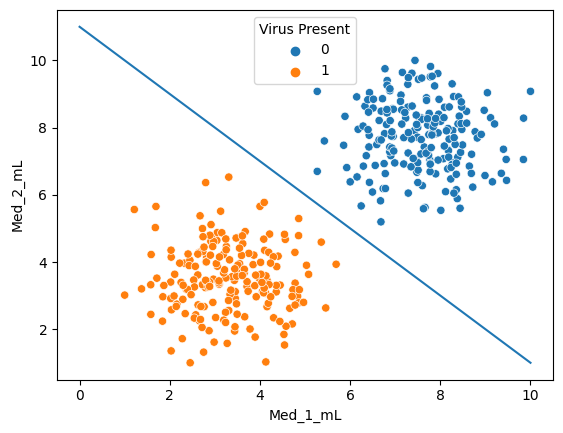

In [20]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)
plt.plot(x,y)

In [8]:
from sklearn.svm import SVC

In [10]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [26]:
X=df.drop('Virus Present',axis=1)
y=df['Virus Present']


In [27]:
model=SVC(kernel='linear',C=1000)

In [28]:
model.fit(x,y)

SVC(C=1000, kernel='linear')

c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


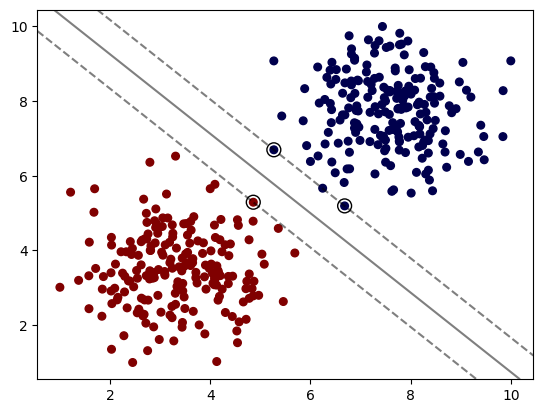

In [30]:
plot_svm_boundary(model,X,y);

In [31]:
from sklearn.model_selection import GridSearchCV

In [86]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomput

In [33]:
model=SVC(C=0.1,kernel='linear',gamma='auto')

In [34]:
model.fit(X,y)

SVC(C=0.1, gamma='auto', kernel='linear')

c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


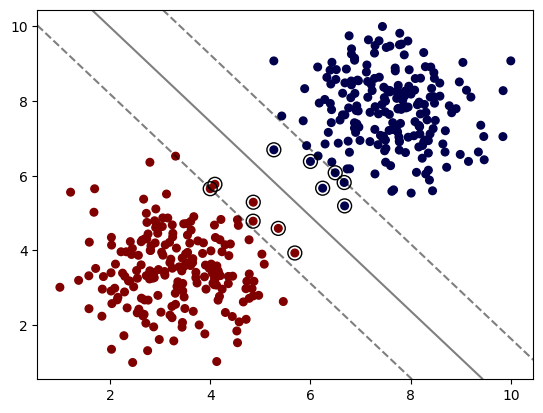

In [35]:
plot_svm_boundary(model,X,y)

In [53]:
model=SVC(kernel='rbf',C=0.5,gamma=0.01)

In [54]:
model.fit(X,y)

SVC(C=0.5, gamma=0.01)

c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


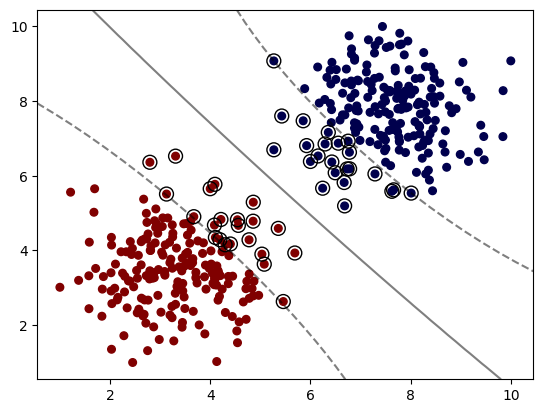

In [55]:
plot_svm_boundary(model,X,y)

In [50]:
model=SVC(kernel='poly',C=1,gamma='scale')

In [51]:
model.fit(X,y)

SVC(C=1, kernel='poly')

c:\Users\adeeb\OneDrive\Desktop\python\machine learning course\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


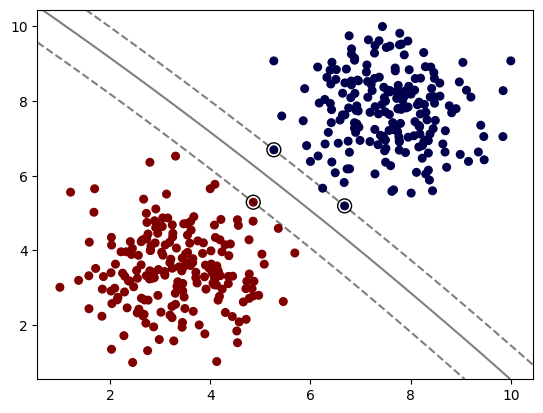

In [52]:
plot_svm_boundary(model,X,y)

In [63]:
svm=SVC()
C=[0.001,0.01,0.1]
# kernal=['linear', 'poly', 'rbf']
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [65]:
grid=GridSearchCV(svm,param_grid=param_grid)

In [66]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [67]:
grid.best_score_

1.0

In [68]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [69]:
df=pd.read_csv('../DATA/cement_slump.csv')

In [70]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [72]:
X=df.drop('Compressive Strength (28-day)(Mpa)',axis=1)
y=df['Compressive Strength (28-day)(Mpa)']

In [73]:
from sklearn.model_selection import train_test_split

In [75]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler=StandardScaler()

In [81]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [83]:
from sklearn.svm import SVR,LinearSVR

In [91]:
param_gridgrid={
    'C':[0.01,0.1,0.001,0.5],
    'gamma': [0.2,0.3,0.4],
    'epsilon':[0.1,0.2,0.3],
    'kernal':['linear','poly','rbf']

    
}

In [92]:
svr=SVR()
grid=GridSearchCV(svr,param_grid)

In [93]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [96]:
preds=grid.predict(scaled_X_test)

In [97]:
preds

array([43.46868363, 41.29260469, 28.45054594, 37.38916249, 36.4312102 ,
       41.67220252, 37.06113899, 31.37370846, 29.46273518, 34.43029976,
       42.92376611, 47.14088057, 45.90578257, 32.33062177, 35.01954876,
       28.27112211, 30.1694472 , 37.3068433 , 30.67940537, 41.34867968,
       49.19422298, 39.54751245, 22.50770652, 50.14446288, 34.14495238,
       48.40847243, 30.76696378, 40.72227943, 36.29535013, 40.03096381,
       32.26059494])

In [98]:
preds.mean()

37.2952216450718

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [100]:
mean_absolute_error(y_test,preds)

2.2029193061873418

In [101]:
mean_squared_error(y_test,preds)

7.528430250777336